In [1]:
#All the libralies used in this project

import pathlib
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

**Data**<br>
This dataset contains the prices and other attributes of almost 54,000 diamonds. There are 10 attributes included in the dataset including the target ie. price.

Feature description:

price<br>
price in US dollars ($326 -- $18,823)This is the target column containing tags for the features. 

The 4 Cs of Diamonds:-

carat (0.2--5.01) The carat is the diamond’s physical weight measured in metric carats.  One carat equals 1/5 gram and is subdivided into 100 points. Carat weight is the most objective grade of the 4Cs. 

cut (Fair, Good, Very Good, Premium, Ideal) In determining the quality of the cut, the diamond grader evaluates the cutter’s skill in the fashioning of the diamond. The more precise the diamond is cut, the more captivating the diamond is to the eye.  

color, from J (worst) to D (best) The colour of gem-quality diamonds occurs in many hues. In the range from colourless to light yellow or light brown. Colourless diamonds are the rarest. Other natural colours (blue, red, pink for example) are known as "fancy,” and their colour grading is different than from white colorless diamonds.  

clarity (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) Diamonds can have internal characteristics known as inclusions or external characteristics known as blemishes. Diamonds without inclusions or blemishes are rare; however, most characteristics can only be seen with magnification.  

**Dimensions**

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

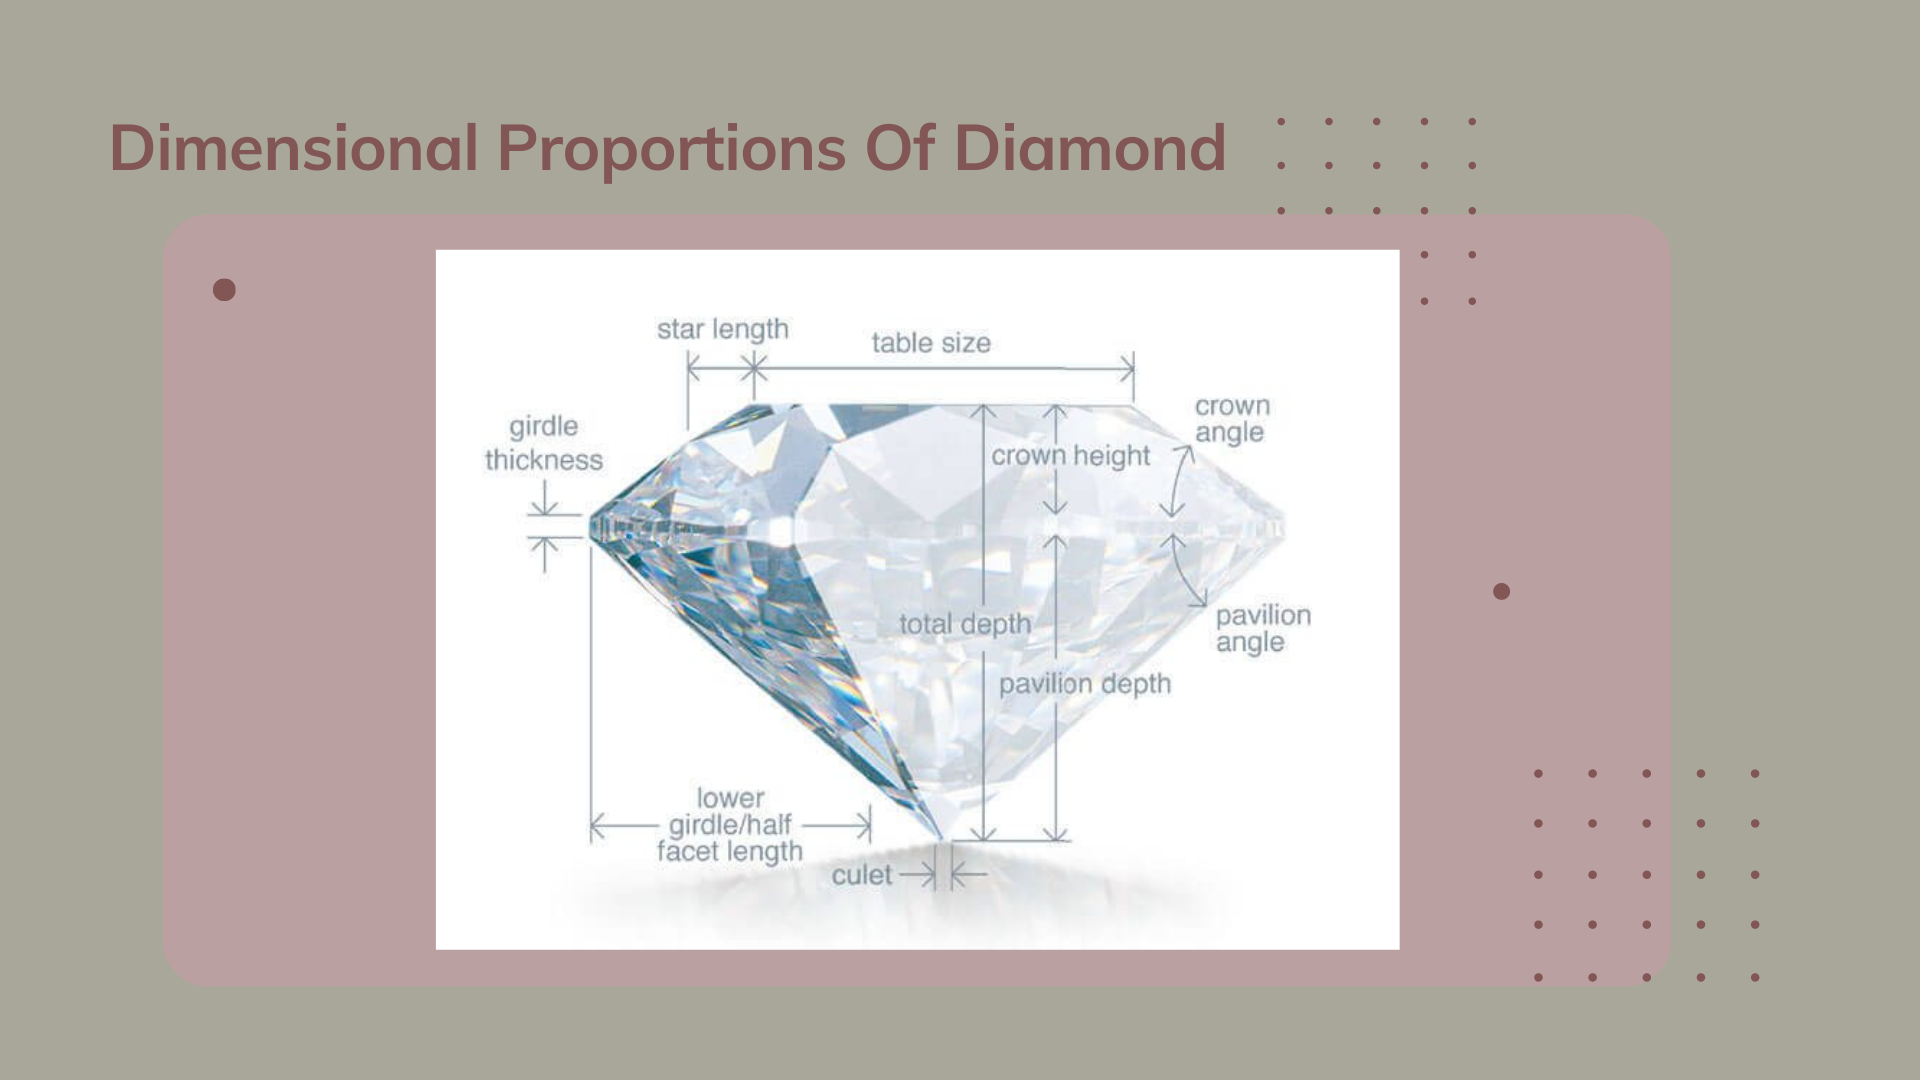

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) The depth of the diamond is its height (in millimetres) measured from the culet (bottom tip) to the table (flat, top surface).

table width of the top of the diamond relative to widest point (43--95)

A diamond's table refers to the flat facet of the diamond seen when the stone is face up. The main purpose of a diamond table is to refract entering light rays and allow reflected light rays from within the diamond to meet the observer’s eye. The ideal table cut diamond will give the diamond stunning fire and brilliance.

# Data Vorbereitung

In [2]:
df_diamond = pd.read_csv('C:/Users/Blenki7/PycharmProjects/MachineLearning/Code_77_ProjektMachineLearning/Projektaufgabe/020_Projekt_diamonds.csv', 
                     delimiter=',')

In [3]:
df_diamond

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df_diamond = df_diamond.drop(["Unnamed: 0"], axis = 1)

In [5]:
df_diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [7]:
df_diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [8]:
df_diamond.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [9]:
df_diamond.loc[df_diamond.duplicated() == True]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [10]:
df_diamond.drop_duplicates(keep="first", inplace=True) #.reset_index(inplace=True, drop=True)
df_diamond.reset_index(inplace=True, drop=True)

In [11]:
df_diamond.loc[df_diamond.duplicated() == True]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [12]:
df_diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53794 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [13]:
# Finding dimentionless diamonds
df_diamond.loc[(df_diamond.x == 0) | (df_diamond.y == 0) | (df_diamond.z == 0), :]

# MB_ANFANG
# Da die Merkmale x, y, z Regressoren vom Regressand depth sind und das Merkmal depth
# zu den Proportionen gehört, die in die Bewertung des Merkmals Cut einfließen, darf keines
# von den Dreien den Wert <= 0 annehmen.
# MB_ENDE


,carat,cut,color,clarity,depth,table,price,x,y,z
2201,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2308,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4778,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5457,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10145,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11156,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11935,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13570,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15914,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24338,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [14]:
#Dropping dimentionless diamonds
df_diamond = df_diamond.drop(df_diamond[df_diamond["x"]==0].index)
df_diamond = df_diamond.drop(df_diamond[df_diamond["y"]==0].index)
df_diamond = df_diamond.drop(df_diamond[df_diamond["z"]==0].index)
df_diamond.reset_index(drop=True)
df_diamond.shape

(53775, 10)

In [15]:
# Checking dimentionless diamonds
df_diamond.loc[(df_diamond.x == 0) | (df_diamond.y == 0) | (df_diamond.z == 0), :]

,carat,cut,color,clarity,depth,table,price,x,y,z


In [16]:
df_diamond.describe()

,carat,depth,table,price,x,y,z
count,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000,53775.000000
mean,0.797536,61.748232,57.457806,3931.220288,5.731579,5.734909,3.539964
std,0.473169,1.429639,2.233257,3985.918716,1.118611,1.139451,0.702017
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.030000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


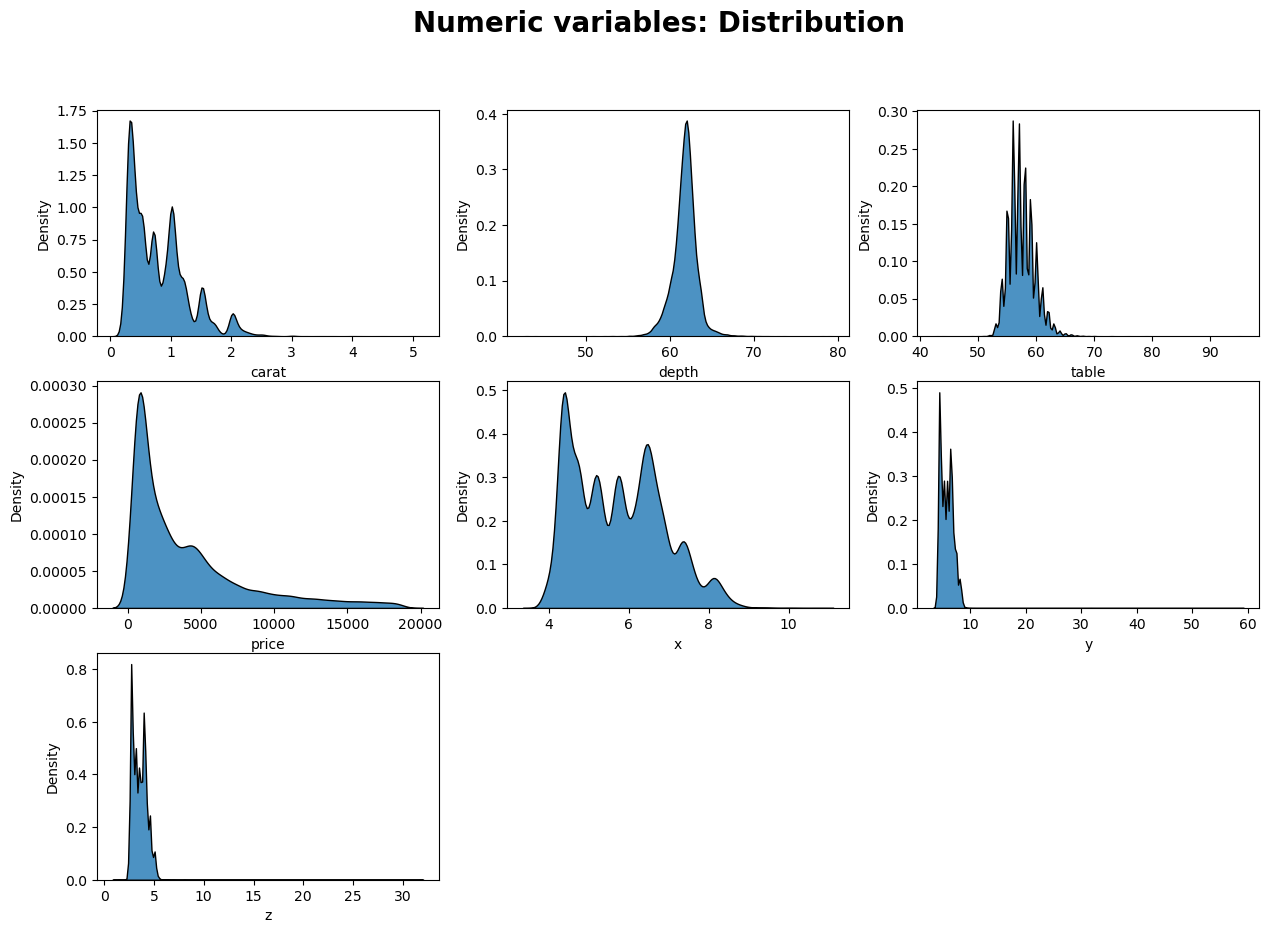

In [17]:
## Data distribution analysis

#Review of numeric and categorical data distibutions and boxplots to visualize outliers.

# plot distribution of numeric variables

int_cols = df_diamond.select_dtypes(exclude='object').columns.to_list() #choose all but object columns

j=0
fig=plt.figure(figsize=(15,10))
plt.suptitle("Numeric variables: Distribution", size=20, weight='bold')

for i in int_cols:
    ax=plt.subplot(331+j)
    ax=sns.kdeplot(data=df_diamond, x=i, fill=True, edgecolor="black", alpha=0.8)
    j=j+1

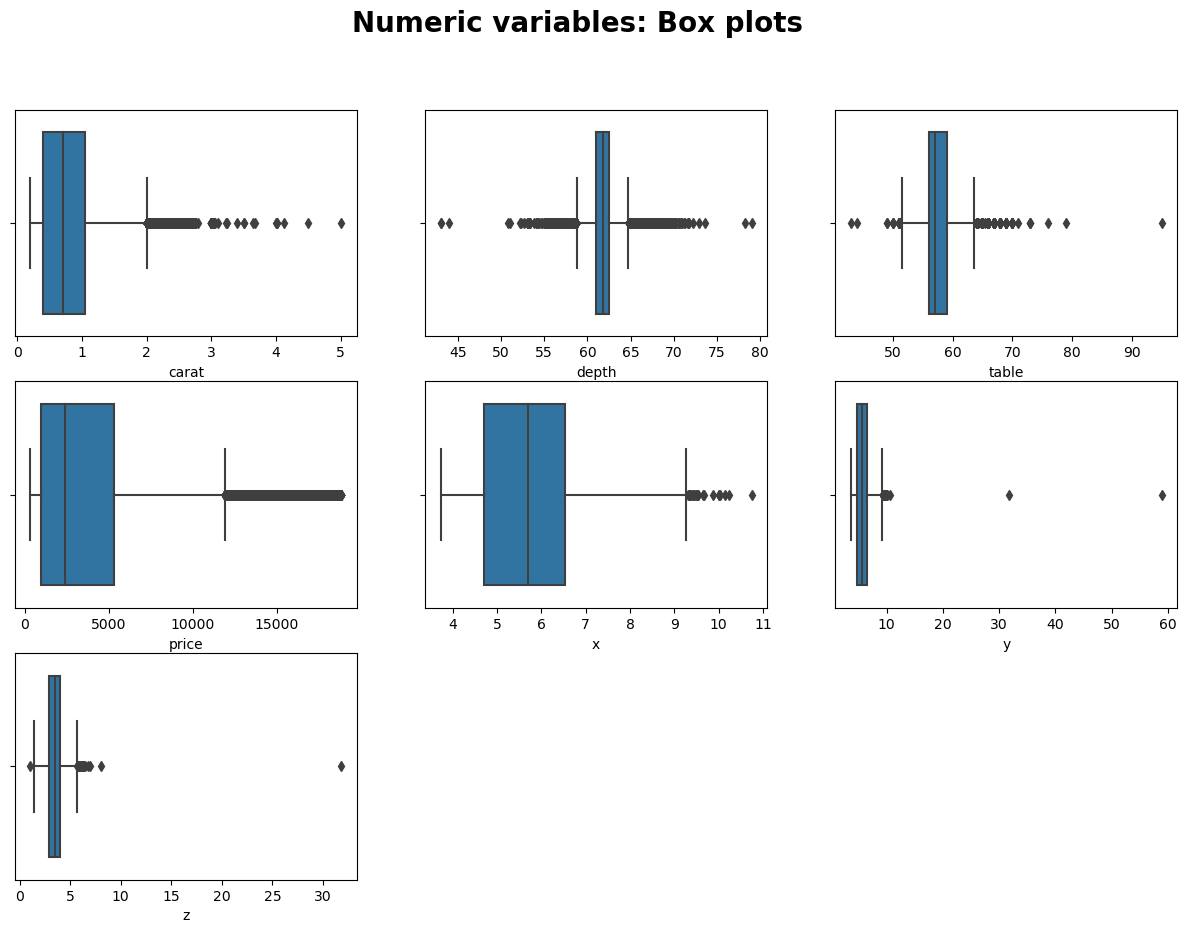

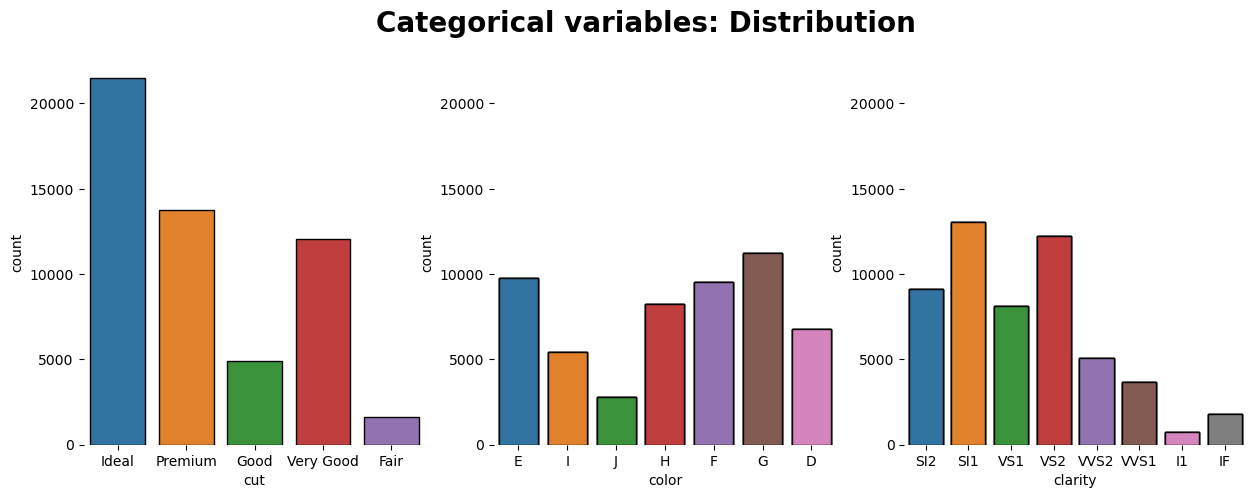

In [18]:
# plot boxplot of numeric variables to visualize outliers

fig=plt.figure(figsize=(15,10))
plt.suptitle("Numeric variables: Box plots", size=20, weight='bold')

j=0
for i in int_cols:
    ax=plt.subplot(331+j)
    ax=sns.boxplot(data=df_diamond, x=i)
    j=j+1

# visualize distribution of categorical variables
cat_cols=df_diamond.select_dtypes(include='object').columns.to_list()

fig=plt.figure(figsize=(15,5))
plt.suptitle("Categorical variables: Distribution", size=20, weight='bold')
ax1=plt.subplot(131)
sns.countplot(data=df_diamond, x=cat_cols[0], ax=ax1, edgecolor="black")
for s in ['left','right','top','bottom']:
    ax1.spines[s].set_visible(False)
    ax2=plt.subplot(132, sharey=ax1)
    sns.countplot(data=df_diamond, x=cat_cols[1], ax=ax2, edgecolor="black")
for s in ['left','right','top','bottom']:
    ax2.spines[s].set_visible(False)
    ax3=plt.subplot(133, sharey=ax1)
    sns.countplot(data=df_diamond, x=cat_cols[2], ax=ax3, edgecolor="black")
for s in ['left','right','top','bottom']:
    ax3.spines[s].set_visible(False)

C:\Users\Blenki7\AppData\Local\Temp\ipykernel_34676\698727057.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_diamond_wo_outliers=df_diamond[~((df_diamond<(Q1-1.5*IQR))|(df_diamond>(Q3+1.5*IQR))).any(axis=1)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 47412 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47412 non-null  float64
 1   cut      47412 non-null  object 
 2   color    47412 non-null  object 
 3   clarity  47412 non-null  object 
 4   depth    47412 non-null  float64
 5   table    47412 non-null  float64
 6   price    47412 non-null  int64  
 7   x        47412 non-null  float64
 8   y        47412 non-null  float64
 9   z        47412 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.0+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 53775 entries, 0 to 53793
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53775 non-null  float64
 1   cut      53775 non-null  object 
 2   color    53775 non-null  object 
 3   clarity  53775 non-null  object 
 4   depth    53775 non-null  float6

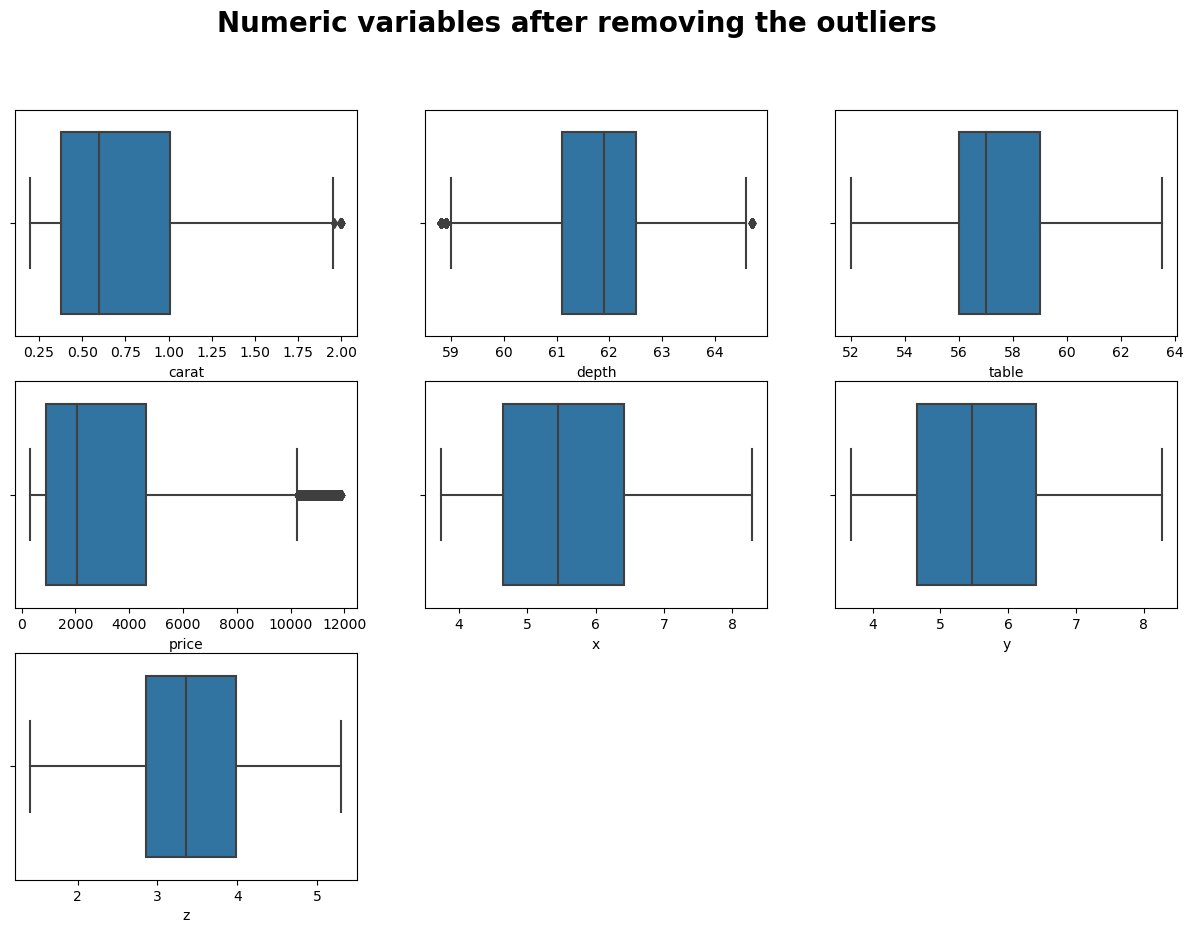

In [19]:
## Outliers
#According to IQR method, outliers are defined by IQR (distance between Q1 and Q3). To build the fence between outliers and non outliers, we take 1.5 times the IQR and then subtract this value from Q1 and add this value to Q3. This gives us the minimum and maximum fence posts that we compare each observation to. Any observations that are more than 1.5 IQR below Q1 or more than 1.5 IQR above Q3 are considered outliers.
#If we use the IQR method on our diamond dataset, we remove ca. 12% of our data.

import scipy.stats as st

Q1 = df_diamond.quantile(0.25)
Q3 = df_diamond.quantile(0.75)
IQR=Q3-Q1
df_diamond_wo_outliers=df_diamond[~((df_diamond<(Q1-1.5*IQR))|(df_diamond>(Q3+1.5*IQR))).any(axis=1)]

int_cols=df_diamond_wo_outliers.select_dtypes(exclude='object').columns.to_list()
j=0
fig=plt.figure(figsize=(15,10))
plt.suptitle("Numeric variables after removing the outliers", size=20, weight='bold')

for i in int_cols:
    ax=plt.subplot(331+j)
    ax=sns.boxplot(data=df_diamond_wo_outliers, x=i)
    j=j+1

df_diamond_wo_outliers.info()
df_diamond.info()

0.26582890285161914

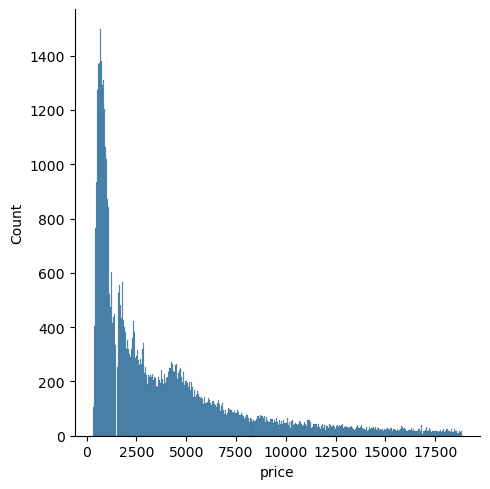

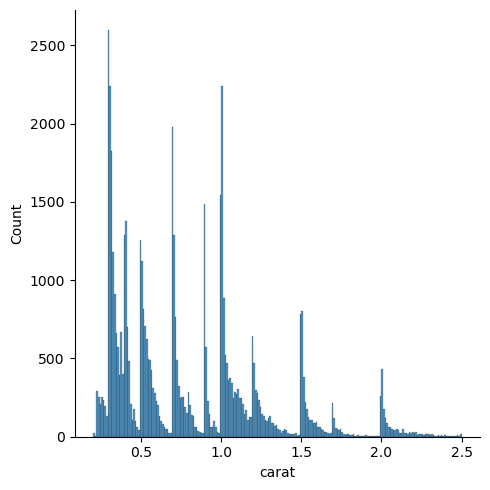

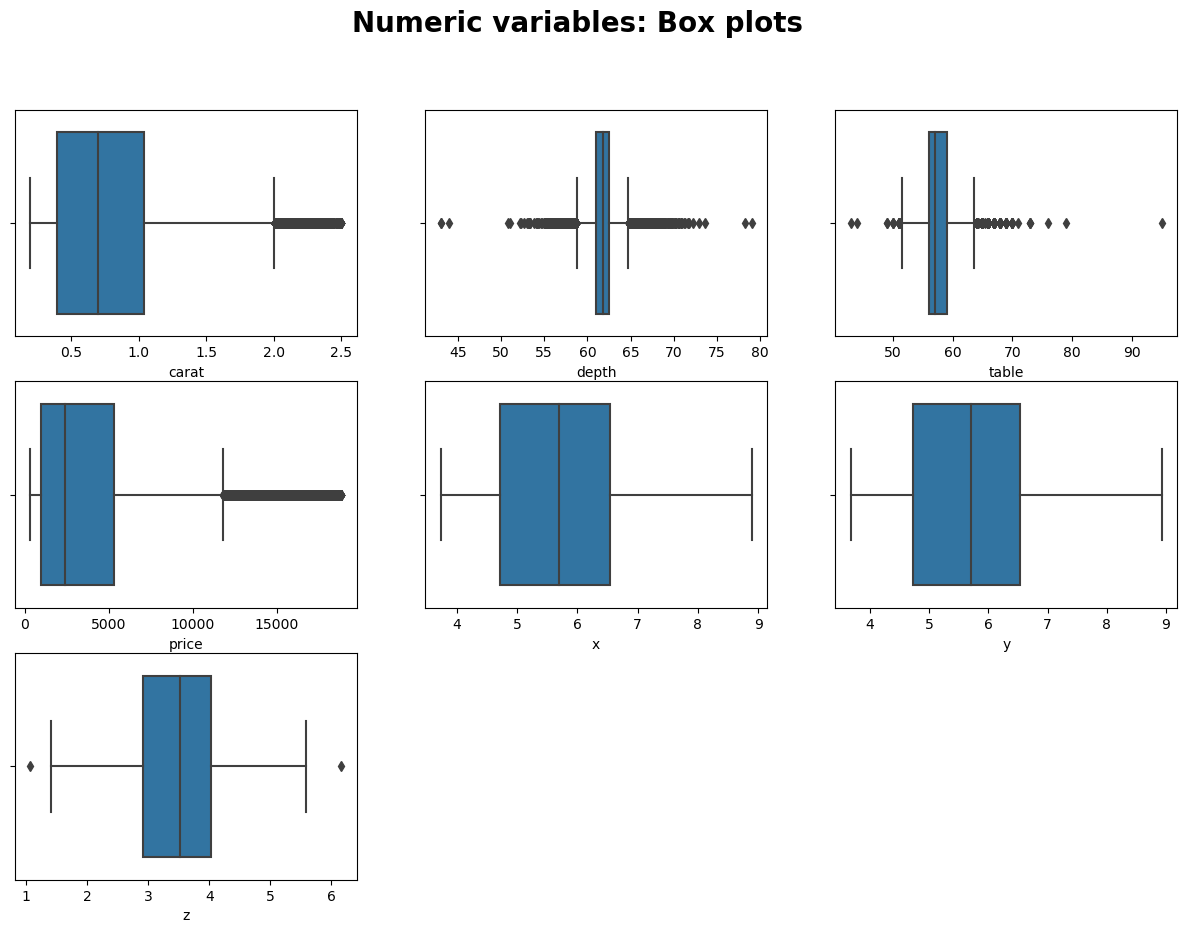

In [20]:
# Outliers part 2
"""
We found that using a 1.5 IQR removes too many data, which we would need to build a reliable model. 
Therefore, we check the data distribution again and decide on the cutoff for each property separately. 
X has outliers, however they do not seem unrealistic. A length of 10 mm is plausible, therefore, 
we do not remove any data here.

Y and Z have got some extreme outliers, namely width above 30 mmm. 
That seems unlikely. These three datapoints will be removed. 

Carat has got a large range and the distribution has got a long tail (right-skew). 
Most diamonds are under 2.5 carats and the diamonds above this weight could distort our model. 
The largest 1% of data will be ignored. We therefore filter diamonds above 99% quantile. 
"""
index_diamond = df_diamond[ (df_diamond['y'] > 20) | (df_diamond['z'] > 10) | (df_diamond['carat'] > 2.5)].index
df_diamond.drop(index_diamond, inplace=True)
df_diamond.describe()

sns.displot(data=df_diamond, x='price',binwidth= 50)
sns.displot(data=df_diamond, x='carat',binwidth= 0.01)

#Price distribution also has a long tail. despite filtering out the largest diamonds. 
#We also observe a price gap at ca. 1500 dollars, this could be an error in the data. We also notice, that price distribution and carat distribution are different, meaning that the price of a diamond is not a simple function of carat. 
#Lets see the Boxplots of numerical variables with removed outliers:

# plot boxplot of numeric variables to visualize outliers

fig=plt.figure(figsize=(15,10))
plt.suptitle("Numeric variables: Box plots", size=20, weight='bold')

j=0
for i in int_cols:
    ax=plt.subplot(331+j)
    ax=sns.boxplot(data=df_diamond, x=i)
    j=j+1

percentage_of_removed_data=(53794-53651)/53794 * 100
percentage_of_removed_data

#We have only removed 0.27% of all data due to outliers. 
#This shold not have a noticeable impact on the model building, 
#therefore, we decided to keep this outliers removal method.

In [21]:
#MB_ANFANG

# Untersuchung der metrischen Merkmale "price", "carat", "depth" und "table" auf Normalverteilung:

#Das Quantil-Quantil-Diagramm dient zur Prüfung von Variablen
# auf Normalverteilung.
# Es vergleicht die tatsächliche Verteilung einer Variable
# mit der idealtypischen Normalverteilung – mithilfe der Quantile.
# Letzteres ist eher unwichtig, da eigentlich nur ein Streudiagramm mit
# einer Gerade erzeugt und interpretiert werden muss.
# Für das Q-Q-Diagramm empfiehlt sich eine z-Standardisierung
# der betreffenden Variable. 

import statsmodels.api as sm
import pylab as py
import scipy.stats as stats
import statistics as st

c_valuator = 1.5

data_price = stats.zscore(df_diamond.price)    #  Skalenniveau ( $, [326 ; 18823] )
max_sampleprice = max(data_price)
min_sampleprice = min(data_price)
third_pricequartiles = st.quantiles(data_price, n=4)
iqr_pricequartiles = third_pricequartiles[2] - third_pricequartiles[0]

data_carat = stats.zscore(df_diamond.carat)    #  Skalenniveau (Gewicht in ct, [0,2 ; 5.01] )
max_samplecarat = max(data_carat)
min_samplecarat = min(data_carat)
third_caratquartiles = st.quantiles(data_carat, n=4)
iqr_caratquartiles = third_caratquartiles[2] - third_caratquartiles[0]

data_depth = stats.zscore(df_diamond.depth)    #  Skalenniveau ( mm, [0 ; 31,8] )
max_sampledepth = max(data_depth)
min_sampledepth = min(data_depth)
third_depthquartiles = st.quantiles(data_depth, n=4)
iqr_depthquartiles = third_depthquartiles[2] - third_depthquartiles[0]

data_table = stats.zscore(df_diamond.table)    #  Skalenniveau (%, [43 ; 95] )
max_sampletable = max(data_table)
min_sampletable = min(data_table)
third_tablequartiles = st.quantiles(data_table, n=4)
iqr_tablequartiles = third_tablequartiles[2] - third_tablequartiles[0]


fig=plt.figure(figsize=(15,15))

ax = fig.add_subplot(2, 2, 1)
sm.graphics.qqplot(data_price,line='45', ax=ax)
ax.set_xlim(third_pricequartiles[0]-c_valuator*iqr_pricequartiles, third_pricequartiles[2]+c_valuator*iqr_pricequartiles)
#ax.set_ylim(min_sampleprice, max_sampleprice)
left = -1.5   #x coordinate for text insert
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top, "QQ-Plot für Merkmal 'price' ", verticalalignment='top')
txt.set_bbox(dict(facecolor='k', alpha=0.1))

ax = fig.add_subplot(2, 2, 2)
sm.graphics.qqplot(data_carat, line='s', ax=ax)
ax.set_xlim(third_caratquartiles[0]-c_valuator*iqr_caratquartiles, third_caratquartiles[2]+c_valuator*iqr_caratquartiles)
#ax.set_ylim(min_samplecarat, max_samplecarat)
left = -1   #x coordinate for text insert
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top,"QQ-Plot für Merkmal 'carat' ", verticalalignment='top')
txt.set_bbox(dict(facecolor='k', alpha=0.1))

ax = fig.add_subplot(2, 2, 3)
sm.graphics.qqplot(data_depth, line='45', fit=True, ax=ax)
ax.set_xlim(third_depthquartiles[0]-c_valuator*iqr_depthquartiles, third_depthquartiles[2]+c_valuator*iqr_depthquartiles)
#ax.set_ylim(min_sampledepth, max_sampledepth)
left = -1  #x coordinate for text insert
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top,"QQ-Plot für Merkmal 'depth' ", verticalalignment='top')
txt.set_bbox(dict(facecolor='k', alpha=0.1))

ax = fig.add_subplot(2, 2, 4)
sm.graphics.qqplot(data_table, line='45', fit=True, ax=ax)
ax.set_xlim(third_tablequartiles[0]-c_valuator*iqr_tablequartiles, third_tablequartiles[2]+c_valuator*iqr_tablequartiles)
#ax.set_ylim(min_sampletable, max_sampletable)
left = -1   #x coordinate for text insert
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top, "QQ-Plot für Merkmal 'table' ", verticalalignment='top')
txt.set_bbox(dict(facecolor='k', alpha=0.1))
   

# Hier ist es wichtig, dass die Beobachtungen (=Punkte) möglichst
# auf oder nahe der idealen Normalverteilung (= Gerade) liegen.
# Je weiter weg Punkte sind, desto eher bezeichnet man sie als "Ausreißer"
# bzw. sind sie von einer idealen Normalverteilung weg.
# Eine genaue Vorgehensweise, was normalverteilt ist und was nicht,
# gibt es allerdings nicht.
# Wenn die Mehrheit der Punkte auf oder nahe der Gerade liegen,
# ist dies meist ausreichend, um von einer hinreichenden
# Normalverteilung auszugehen.
# Exakt einer Normalverteilung wird sowieso fast nie eine Verteilung entsprechen,
# weswegen der Anwender hier auch mitunter etwas pragmatischer sein kann.


# Ergebnis: Für die relevanten Merkmale "carat" und "price" liegen keine Normaverteilungen vor.

#MB_ENDE

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
#MB_Anfang

# Untersuchung der ordinalen Merkmale "cut", "color" und "clarity" mit Pareto-Charts:

from matplotlib.ticker import PercentFormatter

cat_cols=df_diamond.select_dtypes(include='object').columns.to_list()

sample1 = df_diamond.copy(deep=True)
sample2 = sample1[cat_cols[0]].value_counts()
sample3 = pd.DataFrame(sample2)
sample3['cut_art'] = sample2.index
sample3.rename(columns={'cut': 'cut_absolute'}, inplace=True)
sample3 = sample3.sort_values(by='cut_absolute',ascending=False)
sample3['cut_percentage'] = (sample3['cut_absolute'].cumsum()) / (sample3['cut_absolute'].sum())*100

fig, ax = plt.subplots()
ax.bar(sample3['cut_art'], sample3['cut_absolute'], color="C0")
ax2 = ax.twinx()
ax2.plot(sample3['cut_art'], sample3['cut_percentage'], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

left = 2.5  #x coordinate for text insert
top = ax.get_ylim()[1] * 0.75
txt = ax.text(left, top,"Pareto -'cut' ", verticalalignment='top')
plt.show()



bsample1 = df_diamond.copy(deep=True)
bsample2 = bsample1[cat_cols[1]].value_counts()
bsample3 = pd.DataFrame(bsample2)
bsample3['color_art'] = bsample2.index
bsample3.rename(columns={'color': 'color_absolute'}, inplace=True)
bsample3 = bsample3.sort_values(by='color_absolute',ascending=False)
bsample3['color_percentage'] = (bsample3['color_absolute'].cumsum()) / (bsample3['color_absolute'].sum())*100

bfig, bax = plt.subplots()
bax.bar(bsample3['color_art'], bsample3['color_absolute'], color="C0")
bax2 = bax.twinx()
bax2.plot(bsample3['color_art'], bsample3['color_percentage'], color="C1", marker="D", ms=7)
bax2.yaxis.set_major_formatter(PercentFormatter())

bax.tick_params(axis="y", colors="C0")
bax2.tick_params(axis="y", colors="C1")

left = 4.5  #x coordinate for text insert
top = bax.get_ylim()[1] * 0.75
txt = bax.text(left, top,"Pareto -'color' ", verticalalignment='top')
plt.show()





csample1 = df_diamond.copy(deep=True)
csample2 = csample1[cat_cols[2]].value_counts()
csample3 = pd.DataFrame(csample2)
csample3['clarity_art'] = csample2.index
csample3.rename(columns={'clarity': 'clarity_absolute'}, inplace=True)
csample3 = csample3.sort_values(by='clarity_absolute',ascending=False)
csample3['clarity_percentage'] = (csample3['clarity_absolute'].cumsum()) / (csample3['clarity_absolute'].sum())*100

cfig, cax = plt.subplots()
cax.bar(csample3['clarity_art'], csample3['clarity_absolute'], color="C0")
cax2 = cax.twinx()
cax2.plot(csample3['clarity_art'], csample3['clarity_percentage'], color="C1", marker="D", ms=7)
cax2.yaxis.set_major_formatter(PercentFormatter())

cax.tick_params(axis="y", colors="C0")
cax2.tick_params(axis="y", colors="C1")

left = 4.5  #x coordinate for text insert
top = cax.get_ylim()[1] * 0.75
txt = cax.text(left, top,"Pareto -'clarity' ", verticalalignment='top')
plt.show()


#absfreq = df_diamond.groupby(['color','cut', 'clarity']).size() 
#absfreq


#MB_Ende

In [ ]:
#MB_ANFANG
# Beispiel:
# Die Ausprägung/Bewertung "ideal" des Merkmals "cut" beinhaltet über 40% aller Schliffe.
# Die Ausprägungen/Bewertungen "ideal" und "premium" des Merkmals "cut" beinhalteten zusammen
# fast 70% aller Schliffe....


In [22]:

# Auf der Suche nach Auffälligkeiten, Erklärungsversuchen und Clustern:
import plotly.express as px
import plotly.graph_objects as go

cat_cols=df_diamond.select_dtypes(include='object').columns.to_list()
sample_thing = df_diamond.copy(deep=True)

figure = px.scatter(data_frame = sample_thing,
                    x="depth",
                    y="table",
                    size="price", 
                    color= "cut",
                    trendline="ols")
figure.show()


ModuleNotFoundError: No module named 'plotly'

In [ ]:

# Auf der Suche nach Auffälligkeiten, Erklärungsversuchen und Clustern:

figure = px.scatter(data_frame = sample_thing,
                    x="depth",
                    y="table",
                    size="price", 
                    color= "color",
                    trendline="ols")
figure.show()


In [ ]:

# Auf der Suche nach Auffälligkeiten, Erklärungsversuchen und Clustern:

figure = px.scatter(data_frame = sample_thing,
                    x="depth",
                    y="table",
                    size="price", 
                    color= "clarity",
                    trendline="ols")
figure.show()


In [ ]:

# Auf der Suche nach Auffälligkeiten, Erklärungsversuchen und Clustern:

figure = px.scatter(data_frame = sample_thing,
                    x="depth",
                    y="table",
                    size="price", 
                    color= "carat",
                    trendline="ols")
figure.show()


In [ ]:

# Auf der Suche nach Auffälligkeiten, Erklärungsversuchen und Clustern:
sample_thing["size"] = sample_thing["x"] * sample_thing["y"] * sample_thing["z"]

figure = px.scatter(data_frame = sample_thing,
                    x="size",
                    y="carat",
                    size="price", 
                    color= "cut",
                    trendline="ols")
figure.show()
# Wie überraschend: Zwischen Volumen und carat gibt es einen linearen gleichgerichteten Zusammenhang


In [ ]:

# Auf der Suche nach Auffälligkeiten, Erklärungsversuchen und Clustern:
sample_thing["size"] = sample_thing["x"] * sample_thing["y"] * sample_thing["z"]

figure = px.scatter(data_frame = sample_thing,
                    x="size",
                    y="carat",
                    size="price", 
                    color= "color",
                    trendline="ols")
figure.show()
# Wie überraschend: Zwischen Volumen und carat gibt es einen linearen gleichgerichteten Zusammenhang


In [ ]:
# cut, price, color:
fig = px.box(sample_thing,
             x="cut", 
             y="price", 
             color="color")
fig.show()

In [ ]:
# cut, price, clarity:
fig = px.box(sample_thing,
             x="cut", 
             y="price", 
             color="clarity")
fig.show()

In [ ]:
# cut, price, carat:
fig = px.box(sample_thing,
             x="cut", 
             y="price", 
             color="carat")
fig.show()

# Hier erkennt man, daß das Merkmal 'price' sich nicht ausschließlich durch 'cut' und 'carat'
# erklären läßt. Es läßt sich nicht ausschließen, daß cut, color, clarity und carat doch die Regressoren
# für den Regressanden 'price' sind.



In [ ]:
# Die vier c's als Regressoren und 'price' als Regressand: 

fig = px.scatter_3d(sample_thing,
                    x='carat',
                    y='size',
                    z='price',
                    color= "cut")
fig.show()



In [ ]:
fig = px.scatter_3d(sample_thing,
                    x='carat',
                    y='size',
                    z='price',
                    color= "color")
fig.show()

In [ ]:
fig = px.scatter_3d(sample_thing,
                    x='carat',
                    y='size',
                    z='price',
                    color= "clarity")
fig.show()



# ERGEBNIS:
# Durch die Erkenntnisse aus der Explorativen Datenanalyse ist es gerechtfertigt,
# daß wir folgende maschinelle Verfahren einsetzen:
# LinearRegression, Lasso, Ridge,RandomForestRegressor,KNeighborsRegressor, DecisionTreeRegressor




# MB_ENDE

In [ ]:
# Get list of categorical variables
s = (df_diamond.dtypes =="object")
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

In [ ]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df_diamond['cut'] = label_encoder.fit_transform(df_diamond['cut'])
df_diamond['color'] = label_encoder.fit_transform(df_diamond['color'])
df_diamond['clarity'] = label_encoder.fit_transform(df_diamond['clarity'])
df_diamond.head()

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df_diamond.corr(),
 annot=True,
 cmap='RdBu_r')

In [ ]:
g = sns.PairGrid(df_diamond)
g.map(sns.scatterplot)

In [ ]:
df_diamond.columns

In [ ]:
X = df_diamond.drop(['price'], axis=1)
y = df_diamond['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model Erstellung und Testen

## Algorithmen oberflächlich testen

### Mit Standart Scaler

In [ ]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr = Pipeline([("scalar1",StandardScaler()), ("lr",LinearRegression())])
pipeline_la = Pipeline([("scalar2",StandardScaler()), ("la",Lasso(tol=0.001))])
pipeline_ri = Pipeline([("scalar3",StandardScaler()), ("ri",Ridge())])
pipeline_rf = Pipeline([("scalar4",StandardScaler()), ("rf",RandomForestRegressor())])
pipeline_kn = Pipeline([("scalar5",StandardScaler()), ("kn",KNeighborsRegressor())])
pipeline_dt = Pipeline([("scalar6",StandardScaler()),("dt",DecisionTreeRegressor())])
# pipeline_svc = Pipeline([("scalar7",StandardScaler()), ("svc",SVC(kernel="linear"))])


In [ ]:
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_la, pipeline_ri, pipeline_rf, pipeline_kn, pipeline_dt] # , pipeline_svc

# Dictionary of pipelines and model types for ease of reference , 6: "SVC"
pipe_dict = {0: "LinearRegression", 1: "Lasso", 2: "Ridge", 3: "RandomForestRegressor", 4: "KNeighborsRegressor", 5: "DecisionTreeRegressor"}

# Fit the pipelines get the scores.
scores = []
for i, model in enumerate(pipelines):
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    if score > 0.99:
        result = "Possible Overfit"
    elif score < 0.9:
        result = "Underfit"
    else:
        result = "Reasonable"
    score_data = [pipe_dict[i], round(score, 4), result]
    scores.append(score_data)

# Scores to dataframe
df_scores = pd.DataFrame(scores)
df_scores.columns = ["Model Name", "Score", "Result"]
df_scores


### Mit MinMax Scaler

In [ ]:
# Building pipelins of standard scaler and model for varios regressors.

pipeline_lr = Pipeline([("scalar1",MinMaxScaler()), ("lr",LinearRegression())])
pipeline_la = Pipeline([("scalar2",MinMaxScaler()), ("la",Lasso(tol=0.001))])
pipeline_ri = Pipeline([("scalar3",MinMaxScaler()), ("ri",Ridge())])
pipeline_rf = Pipeline([("scalar4",MinMaxScaler()), ("rf",RandomForestRegressor())])
pipeline_kn = Pipeline([("scalar5",MinMaxScaler()), ("kn",KNeighborsRegressor())])
pipeline_dt = Pipeline([("scalar6",MinMaxScaler()),("dt",DecisionTreeRegressor())])
# pipeline_svc = Pipeline([("scalar7",MinMaxScaler()), ("svc",SVC(kernel="linear"))])

In [ ]:
# List of all the pipelines
pipelines = [pipeline_lr, pipeline_la, pipeline_ri, pipeline_rf, pipeline_kn, pipeline_dt] # , pipeline_svc

# Dictionary of pipelines and model types for ease of reference , 6: "SVC"
pipe_dict = {0: "LinearRegression", 1: "Lasso", 2: "Ridge", 3: "RandomForestRegressor", 4: "KNeighborsRegressor", 5: "DecisionTreeRegressor"}

# Fit the pipelines get the scores.
scores1 = []
for i, model in enumerate(pipelines):
    model.fit(X_train, y_train)
    score1 = model.score(X_train, y_train)
    if score1 > 0.99:
        result = "Possible Overfit"
    elif score1 < 0.9:
        result = "Underfit"
    else:
        result = "Reasonable"
    score_data1 = [pipe_dict[i], round(score1, 4), result]
    scores1.append(score_data1)

# Scores to dataframe
df_scores = pd.DataFrame(scores1)
df_scores.columns = ["Model Name", "Score", "Result"]
df_scores

## Linear Regresion, Lasso and Ridge

In [ ]:
# List of all the pipelines
lr_pipelines = [pipeline_lr, pipeline_la, pipeline_ri]

# Dictionary of pipelines and model types for ease of reference
lr_dict = {0: "LinearRegression", 1: "Lasso", 2: "Ridge"}

# Fit the pipelines
scores2 = []
for i, model in enumerate(lr_pipelines):
    model.fit(X_train, y_train)
    accuracies = np.round(cross_val_score(estimator=model, X=X_train, y=y_train, cv=3, verbose=1), 4)
    y_pred = model.predict(X_test)
    score2 = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)**0.5
    r2 = r2_score(y_test, y_pred)
    score_data2 = [pipe_dict[i], round(score, 4), accuracies, round(mse, 4), round(mae, 4), round(rmse, 4), round(r2, 4)]
    scores2.append(score_data2)

# Scores to dataframe
df_scores2 = pd.DataFrame(scores2)
df_scores2.columns = ["Model Name", "CV_Score", "Accuracies", "MSE", "MAE", "RMSE", "R2"]
df_scores2



## Random forest

In [ ]:
#Modelling
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score

def evaluate_model(x_test=None,y_test=None,model=None,name='Linear Regression',color='red'):
    #1. make predictions
    #2. evaluate the model 
    #3. plot the regression line

    #Inputs:X_test,y_test, model object, model name

    predicted = model.predict(X_test)
    actual=y_test
    metric_scores(actual,predicted,name)
    plt.figure(figsize=(12,8))
    plt.scatter(actual, predicted, c=color)
    mxp,mxa,mnp,mna = max(predicted),max(actual),np.min(predicted),np.min(actual)
    p1 = mxp if mxp>mxa else mxa
    p2 = mnp if mnp<mna else mna
    plt.plot([p1, p2], [p1, p2],'#000066')
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.title(name,fontsize=30)
    plt.axis('equal')
    plt.show()

d={}
def metric_scores(actual,predicted,name):
    # Evaluate and store the evaluation metric scores.
    # Inputs: y_test, y_pred, model name 

    mae = mean_absolute_error(actual,predicted)
    mse = mean_squared_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    r2 = r2_score(actual,predicted)

    d[name]=[mae,mse,mape,r2]

    print('Mean Absolute Error is {:.3f}'.format(mae))
    print()
    print('Mean Squared Error is {:.3f}'.format(mse))
    print()
    print('Mean Absolute Percentage Error is {:.3f}'.format(mape))
    print()
    print('R Squared Error is {:.3f}'.format(r2))
    print()

# Algorithmen intensiver testen -> Random forest.
for n_estimator in 5,10, 50, 100,500:
    print("--------------------------------------------------------------------------------------------------------------")
   
    print('Random Forest Model with {} estimators)'.format(n_estimator))
    print("--------------------------------------------------------------------------------------------------------------")
   
    model=RandomForestRegressor(n_estimators=n_estimator) #, verbose=4)
    model.fit(X_train, y_train)
    title = 'RandomForest; no_estimators: {}.'.format(np.round(n_estimator),3)
    evaluate_model(x_test=X_test,y_test=y_test,model=model,name=title,color='lightgray')
    cr_val_score=cross_val_score(model, X_train, y_train, cv=3)
    mod_score = model.score(X_train, y_train)
    print("Model score: ", mod_score)
    print("Cross validation scores: ",cr_val_score)
    print("Accuracy of model with Train data: {}".format(np.round(model.score(X_train, y_train),3)))
    print("Accuracy of model with Test data: {}".format(np.round(model.score(X_test, y_test),3)))
    print()
    print()

# KNN Algorithmus (MB_Anfang)


In [ ]:
# MB_ANFANG

# Regression: Used to make predictions where the output is a continuous value,
#             such as logistic regression.
# Classification: are those algorithms that are used to classify between the categorical values. 

 
# Der k-Nearest-Neighbor-Algorithmus (k-NN) nutzt den Ansatz des
# sogenannten Lazy Learnings (=trägen Lernens).
# Bei dieser Klasse von Verfahren findet die Hauptarbeit nicht beim
# Training statt, sondern erst zur Zeit der Anfrage. 
# Hier kann nämlich das Modell lokal um den Abfragepunkt herum gebildet
# werden. Das ist durchaus öfter genauer als globale Modelle,
# welche allgemein erzeugt werden und keinen speziellen Ansatzpunkt haben,
# um den herum nur ein kleiner Bereich angenähert werden muss.
# Neben der lokalen Entwicklung hat es noch den Vorteil, dass es fast
# parameterfrei ist.

# " Die Grundidee beim k-NN ist es, eine Regression oder Klassenzuordnung
# für einen Abfragepunkt x auf der Basis seiner k nächsten Nachbarn
# durchzuführen."
# Um die beiden Anwendungsfälle zu unterscheiden,
# spricht man von k-NN Classification (Teil A) und k-NN Regression (Teil B).


# Informationen zu dem Algorithmus:
# (a) Prinzip:
# Ähnlichkeit zwischen Objekten ordnen diese in Nachbarschaften ein.
# Voraussage richtet sich nach den Elementen der Nachbarschaft
#
# (b) Getroffene Vorannahmen des Algorithmus:
# gewählte Metrik
# gewähltes k
#
# (c) Einbezug des Menschen:
# Nachvollzug von Ähnlichkeit nur bei wenigen Spalten möglich
#
# (d) Datenmenge:
# nicht: bei vielen Spalten
#
# (e) Datenvorbereitung:
# Skalierung wichtig
#
# (f) Zielspalte und zulässige Daten:
# Klassifikation + Regression (geeignet für kategorische Daten,
#                              bei metrischen Daten muss
#                              interpoliert werden)
#
# (g) Klassen: 
#  sklearn.neigbours…
#   KneighborsClassifier,
#   KneighborsRegressor
#   RadiusNeighborsClassifier
#   RadiusNeighborsRegressor
#
# (h) Laufzeit bei n=#Zeilen und f=#Spalten
#  Laufzeit hängt vom Sortieren ab
#            Training: O(n²f) , je nach Algorithmus weniger
#            Predict: O(n*f)
#
# (i) Incrementelles Lernen: 
#   Trennung von Vorsortieren und Verarbeiten
#
# (j) Verhalten bei Ausreißern/Rauschen: 
#    gut   
#
# (k) Hinweise, welche Spalten besonders wichtig sind:
#   Nein es gibt keine Hinweise darauf, deswegen ist eine extensive Vorarbeit
#   in explorativer Datenanalyse extrem wichtig.



# TEIL A: Klassifikation
# sklearn.neighbors: Nearest Neighbors
#
# Die gesamte Klassifikation findet nun in der Funktion plainKNNclassification statt. Die erste
# Aktion hierbei ist die einheitliche Skalierung aller Merkmale auf das Intervall [0,1].
# Würde man auf eine Skalierung verzichten, ergäben sich Probleme bei Merkmalen,
# die aus unterschiedlichen Größenordnungen kommen.
# Indem wir skalieren, erhalten beide Merkmale die gleiche Bedeutung.
# Will man ein Merkmal stärker gewichten, kann man hier natürlich z.B. mit einem Faktor
# größer Eins Akzente setzen.
# Neben der Skalierung ist die verwendete Norm einer der wichtigsten Parameter für diese Methode.
# Oft kommt die euklidische Norm zum Einsatz, doch andere Normen können je nach
# Anwendungsfall bessere Ergebnisse liefern.
# Die Wahl der Norm ist also besonders wichtig in Grenzfällen zwischen zwei Gruppen
# und wenn das Verfahren auf Gebiete ohne bzw. mit wenig Daten extrapoliert.
# Die Güte des k-NN hängt stark von der Dichte sowie der vorliegenden Daten im Raum ab und
# ist daher auch sehr anfällig für den Fluch der Dimensionalität.
# Es lohnt sich daher beim k-NN immer, Techniken zur Dimensionsreduktion in Erwägung zu
# ziehen.
# Eine Schwäche des Verfahrens ist der Aufwand, der pro Abfrage entsteht.
# Wir müssen bei jeder Klassifizierung pro in der Datenbank gespeichertem Beispiel
# den Abstand berechnen und dann die nächsten Nachbarn auf der Basis der Abstände suchen.

#-----------------------------------------------------------------
#Schritt_1: KNN-Algorithmus oberflächlich testen
#-----------------------------------------------------------------

# Auswahl der Bibliotheken:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


#-----------------------------------------------------------------

# Auswahl der Merkmale, siehe unter Datei "100_MichaelBlenkVorarbeitArbeitsbericht_Diamonds.odt":
linab_sample = df_diamond.copy(deep=True)   # Beachte: Kategoriale Daten wurden bereits
                                            # auf natürliche Zahlen umtransformiert !!!
X = linab_sample[{'cut','color','clarity','carat'}]
y = linab_sample['price']
#-----------------------------------------------------------------

# Aufteilung/Splitting des samples in Trainingsmenge und Testmenge:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=66)
#-----------------------------------------------------------------

# Skalierung der Daten auf das Intervall [0,1] unter der Beachtung,
# daß kategoriale und metrische Merkmale hier auftreten.
# Aus diesem Grund verwenden wir hier den MinMaxScaler:
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
min_max_scaler.fit(X_train)
min_max_scaler.fit(X_test)
X_train_norm =  min_max_scaler.transform(X_train)    # Beachte: Nur der Input wird normiert !!!!
X_test_norm  =  min_max_scaler.transform(X_test)    # Beachte: Nur der Input wird normiert !!!!
#-----------------------------------------------------------------
# Alternative dazu besser ist die Pipeline.
# Regression based on k-nearest neighbors:
pipeline_mkn = Pipeline([("scalar5",min_max_scaler), ("mkn",KNeighborsRegressor(n_neighbors=3))])
pipeline_clf = Pipeline([("scalar5",min_max_scaler), ("clf",KNeighborsClassifier(n_neighbors=3))])
#-----------------------------------------------------------------

# Modellierung hier mit X_train.
# Alles in der Pipeline wird nach und nach abgearbeitet:
pipeline_mkn.fit(X_train, y_train)
predict_mkn = pipeline_mkn.predict(X_train)
score_mkn   = pipeline_mkn.score(X_train, y_train)
print("Test set predictions mkn:\n", predict_mkn)
print("Test set R^2 mkn: {:.6f}".format(score_mkn))
print()
print()
pipeline_clf.fit(X_train, y_train)
predict_clf = pipeline_clf.predict(X_train)
score_clf   = pipeline_clf.score(X_train, y_train)
print("Test set predictions clf:\n", predict_clf)
print("Test set R^2 clf: {:.6f}".format(score_clf))


In [ ]:
#-----------------------------------------------------------------
# Schritt_2: Training und Bewertung von Modellen 
# insbesondere den KNN-Algorithmus bei der Parameterauswahl optimieren,
# schwerpunktmäßig gewählte Metrik und Anzahl der k nächsten Nachbarn.
# Aufteilung in Kreuzvalidierung und GridSearch
#-----------------------------------------------------------------

# Schritt_2: Training und Bewertung auf den TRAININGSDATEN X_train und y_train:
rmse_val = []
r2_val   = []

p_knn = 1
for k in range(10):
    k = k + 1
    for p_knn in range(3):
        p_knn = p_knn + 1
        pipeline_mkn = Pipeline([("scalar5",min_max_scaler), ("mkn",KNeighborsRegressor(n_neighbors = k, p = p_knn))])
        pipeline_mkn.fit(X_train, y_train)    # mit den Trainingsdaten gefüttert/trainiert      
        predict_mkn = pipeline_mkn.predict(X_train)   # mit den Testdaten geprüft/getestet  
        score_mkn   = pipeline_mkn.score(X_train, y_train)        
        error = np.sqrt(mean_squared_error(y_train, predict_mkn)) # Quadratische Abweichung y_test von den geschaetzten pred
        rmse_val.append(error)             # Wir sammeln diese quadratischen Abweichungen
        #print("rmse_val for k=", k, " and ", "P Wert= ", p_knn , "is: ", error)
        schaetzer_mkn = pipeline_mkn.score(X_train, y_train)
        r2_val.append(schaetzer_mkn) 
        print("r2_val for k=", k, " and ", "P Wert= ", p_knn , "is: ", schaetzer_mkn)
               
print()
print()
print("min_rmse_val bzw. geringste Fehlerquadratsumme: ", min(rmse_val)) 
print("max_r2_val bzw. höchster Score:                 ", max(r2_val))        
  


In [ ]:
#-----------------------------------------------------------------
# Schritt_3: Training und Bewertung auf den TRAININGSDATEN X_train und y_train
# unter Zuhilfenahme der "Cross-Validation":
#-----------------------------------------------------------------

from sklearn.model_selection import cross_val_score

pipeline_mkncross = Pipeline([("scalar5",min_max_scaler), ("mkn",KNeighborsRegressor())])
pipeline_mkncross.fit(X_train, y_train)


crossvalue1 = -cross_val_score(estimator = pipeline_mkncross,
                             X = X_train,
                             y= y_train,
                             scoring="neg_root_mean_squared_error",
                             cv=200)
print("Geringste Fehlerquadratsumme bei crossvalue1: ", min(crossvalue1)) 


crossvalue2 = cross_val_score(estimator = pipeline_mkncross,
                              X = X_train,
                              y= y_train,
                              scoring="r2",
                              cv=200)
print("Höchster Score beim crossvalue2: ", max(crossvalue2)) 


print("Zum Vergleich in Schritt_2 bekamen wir die Ergebnisse:") 
print("min_rmse_val bzw. geringste Fehlerquadratsumme: ", min(rmse_val)) 
print("max_r2_val bzw. höchster Score:                 ", max(r2_val))       

# Die geringste Fehlerquadratsumme beim cross_val_score beträgt 415,16;
# Im Vergleich zu Schritt_2 betrug dort die geringste geringste Fehlerquadratsumme 468.67.

# Die größte Score beim cross_val_score beträgt 0,9879;
# Im Vergleich zu Schritt_2 betrug dort der größte Score 0.9858.
# => Kein Under- und kein Overfitting beim Algorithmus. Weiter so....

In [ ]:
#-----------------------------------------------------------------
# Schritt_4: Fine Tuning des Models auf den TRAININGSDATEN X_train und y_train
# unter Zuhilfenahme des "Grid-Searchs":
#-----------------------------------------------------------------

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

pipeline_mkngrid = KNeighborsRegressor()
              
# param_grid enthält eine Dictionary, das ausgewählte Parameter von der Klasse zeigt.
# Die Listen, die hinter den Parametern stehen , enthalten mögliche Werte der Parameter.

#parameter_grid = [{'weights':['uniform','distance'],
#                  'n_neighbors':[2,3,4,5],
#                  'algorithm':['auto','ball_tree','kd_tree','brute']}]

#parameter_grid = [{"n_neighbors": [2,3,4,5]}]

parameter_grid={'p':[1,2,3]}

grid_search = GridSearchCV(estimator=pipeline_mkngrid,
                           param_grid= parameter_grid,
                           cv=5,
                           scoring='r2',
                          return_train_score=True)

      
# Das grid_search-Objekt führt ein fit für jede Parameter-kombination aus und
# macht auch eine Kreuz-Evaluierung (Crossval)
grid_search.fit(X_train,y_train)
score_grid   = grid_search.score(X_train, y_train) 

print("KNN")
print("Training Data Score:  ",  max(r2_val))         
print("Cross-Value Score :       ",  max(crossvalue2)) 
print("GridSearchValue:       ",  score_grid) 




In [ ]:
#-----------------------------------------------------------------
# Schritt_5: Testen des Modells JETZT auf den TESTDATEN X_test und y_test
#-----------------------------------------------------------------

pipeline_mknbest = Pipeline([("scalar5",min_max_scaler),
                             ("mknbest",KNeighborsRegressor(n_neighbors = 2, p = 2))])

pipeline_mknbest.fit(X_test, y_test)


predict_mknbest = pipeline_mknbest.predict(X_test)
score_mknbest   = pipeline_mknbest.score(X_test, y_test)

#-----------------------------------------------------------------
print ("Abweichungen:", predict_mknbest)
print ("TestScoreValue:", score_mknbest)
 


In [ ]:
print("KNN")
print("Kein Overfitting oder Kein Underfitting")
print("Training Data Score:  ",  max(r2_val))         
print("Cross-Value Score :       ",  max(crossvalue2)) 
print("GridSearchValue:       ",  score_grid) 
print ("Test Data Score:", score_mknbest)

## Desicion Tree Model

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(max_depth=10, random_state=66 )
dec_tree.fit(X_train, y_train)

# Prediction
ypred =  dec_tree.predict(X_train)

# Checking Accuracy
print(r2_score(y_train, ypred))

# Prediction
ypred_test =  dec_tree.predict(X_test)

# Checking Accuracy
#print(r2_score(y_test, ypred_test))


In [ ]:
max_dep = [6,7,8,9,10,11,12,13]
criterions = ['squared_error', 'friedman_mse',  'poisson'] # 'absolute_error'-> langsam
dep_score = []
index = 0
data = pd.DataFrame(columns=["MaxDepth", "Criterion", "Score"])
for i in max_dep:
    for j in criterions:
        dec_tree = DecisionTreeRegressor(criterion =j, max_depth=i, random_state=42)
        dec_tree.fit(X_train, y_train)
        ypred =  dec_tree.predict(X_test)
        index += 1
        data.loc[index] = [i , j, round(r2_score(y_test, ypred),5)]
        print("Maximum depth:",i, "Criterion:",j, "R2 Value:", round(r2_score(y_test, ypred),5))
    

In [ ]:
data

In [ ]:
df_pivot = pd.pivot_table(data, 
                          values="Score", 
                          index="MaxDepth", 
                          columns="Criterion", 
                          aggfunc=np.mean)

df_pivot.plot.bar()

In [ ]:
#pip install dtreeviz
#?????
# """from sklearn import tree
# import graphviz
# # DOT data
# dot_data = tree.export_graphviz(dec_tree, out_file=None, 
#                                 feature_names=X_test,  
#                                 class_names=y_test,
#                                 filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph
# """


### Decision Tree - Cross Validation Score

In [ ]:
def display_scores(scores):
    print(f"Scores: {np.round(scores, 4)}")
    print(f"Mean: {np.round(scores.mean(), 4)}")
    print(f"Standard deviation: {np.round(scores.std(), 4)}")

In [ ]:
X

In [ ]:
scores = cross_val_score(dec_tree, X_train, y_train,
                        scoring="neg_mean_squared_error", cv=10)

In [ ]:
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
# Evaluation scores for decision tree regressor
display_scores(tree_rmse_scores)

In [ ]:
results = []
names = []

seed=12

for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = '{}:  score: {:.2f},  std_dev:{:.2f}'.format(name, 
    cv_results.mean(), cv_results.std()) 
    print(msg)